Reinforcement Learning

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

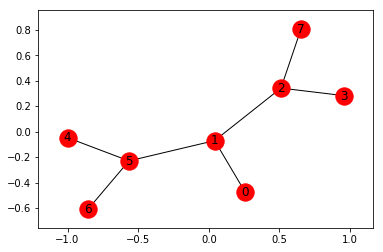

In [3]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]


goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
# how many points in graph? x points
MATRIX_SIZE = 8

In [5]:
# create matrix x*y
# Create Reward Matrix
# Cost of every move = -1
#
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [6]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [19]:
# add goal point round trip
#Add one more entry in the Reward Matrix
# Reward for moving from state 7 to state 7 = 100

R[goal,goal]= 100

R

matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

In [8]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

Q

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
# learning parameter
gamma = 0.8

initial_state = 1

In [10]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

In [11]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

In [12]:
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [13]:
update(initial_state, action, gamma)

max_value 0.0


0

In [14]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0

Score: 980.857028776
max_value 398.79107418
Score: 980.857028776
max_value 498.79107418
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 398.79107418
Score: 980.323292879
max_value 398.79107418
Score: 980.323292879
max_value 202.911053407
Score: 980.323292879
max_value 202.911053407
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 398.79107418
Score: 980.323292879
max_value 319.032859344
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 253.638816759
Score: 980.323292879
max_value 499.032859344
Score: 979.89676964
max_value 398.79107418
Score: 979.89676964
max_value 398.79107418
Score: 979.89676964
max_value 253.638816759
Score: 979.89676964
max_value 398.79107418
Score: 979.89676964
max_value 319.032859344
Score: 979.89676964
max_value 253.638816759
Score: 979.89676964
max_

In [15]:
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[   0.           63.99617142    0.            0.            0.            0.
     0.            0.        ]
 [  51.19693713    0.           79.99521427    0.            0.
    51.19693713    0.            0.        ]
 [   0.           63.99617142    0.           63.99617142    0.            0.
     0.          100.        ]
 [   0.            0.           79.99521427    0.            0.            0.
     0.            0.        ]
 [   0.            0.            0.            0.            0.
    51.19693713    0.            0.        ]
 [   0.           63.99617142    0.            0.           40.95754971
     0.           40.95754971    0.        ]
 [   0.            0.            0.            0.            0.
    51.19693713    0.            0.        ]
 [   0.            0.           80.            0.            0.            0.
     0.          100.        ]]


In [16]:
# Testing
current_state = 0
steps = [current_state]

In [17]:
while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


Most efficient path:
[0, 1, 2, 7]


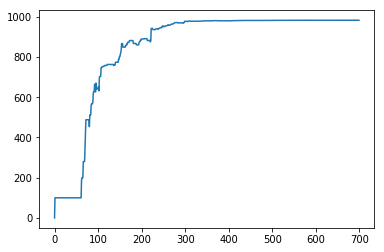

In [18]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()